# NescienceDecisionTree
### Evaluation

Detailed evaluation of the algorithm to compute a decision tree based on the minimum nescience principle, and a comparison with the decision tree algorithm implemented by scikit learn.

In [1]:
import pandas as pd
import numpy as np
import random

# Graphics
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree

# Datasets
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes

# Models
from NescienceDecisionTree import NescienceDecisionTreeClassifier
from NescienceDecisionTree import NescienceDecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

# Evaluation of models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Synthetic Datasets

### One single line

In [2]:
# We always add this line for the reproducibility of results
random.seed(0)

X = list()
y = list()

for i in range(1000):
    
    p = list([random.randint(0, 100), random.randint(0, 100)])
    X.append(p)
    
    if p[0] >= 50:
        y.append(1)
    else:
        y.append(0)

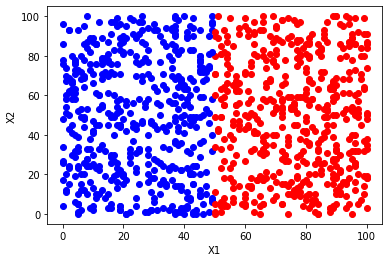

In [3]:
for i in range(len(X)):
    px = X[i][0]
    py = X[i][1]
    if y[i] == 1:
        plt.scatter(px, py, color=['red'])
    else:
        plt.scatter(px, py, color=['blue'])

plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [4]:
model = NescienceDecisionTreeClassifier(verbose=True)
model.fit(X, y)

Miscoding:  0.01571190643505571 Inaccuracy:  1.136881498637552e-16 Surfeit:  0.23750000000000004 Nescience:  0.2380191462967296
Miscoding:  0.01571190643505571 Inaccuracy:  1.136881498637552e-16 Surfeit:  0.23750000000000004 Nescience:  0.2380191462967296
Final nescience: 0.2380191462967296
def tree{'X1'}:
    if X1 < 49.500:
        return 0
    else:
        return 1



In [5]:
model.score(X, y)

1.0

Perfect result. Compare with scikit learn

In [6]:
model_sk = DecisionTreeClassifier()
model_sk.fit(X, y)
model_sk.score(X, y)

1.0

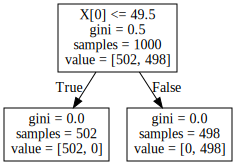

In [7]:
dot_data = tree.export_graphviz(model_sk, out_file=None)
graph = graphviz.Source(dot_data)
graph

We have got the same result.

### One single line with small error

In [8]:
# We always add this line for the reproducibility of results
random.seed(0)

X = list()
y = list()

for i in range(1000):
    
    p = list([random.randint(0, 100), random.randint(0, 100)])
    X.append(p)
    
    if p[0] >= 50:
        y.append(1)
    else:
        y.append(0)

Let's introduce a small error

In [9]:
p = list([20, 20])
X.append(p)
y.append(1)

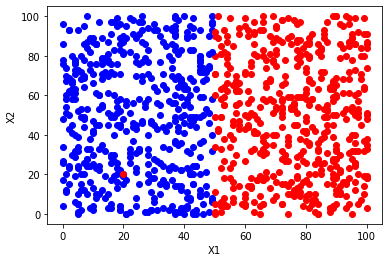

In [10]:
for i in range(len(X)):
    px = X[i][0]
    py = X[i][1]
    if y[i] == 1:
        plt.scatter(px, py, color=['red'])
    else:
        plt.scatter(px, py, color=['blue'])
        
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()        

In [11]:
model = NescienceDecisionTreeClassifier(verbose=True)
model.fit(X, y)

Miscoding:  0.015460878212030682 Inaccuracy:  0.010405336737545333 Surfeit:  0.23750000000000004 Nescience:  0.23823005643224152
Miscoding:  0.0 Inaccuracy:  0.010405336737545333 Surfeit:  0.46308724832214765 Nescience:  0.46320413490296064
Miscoding:  0.0 Inaccuracy:  0.010405336737545333 Surfeit:  0.59375 Nescience:  0.5938411686070795
Miscoding:  0.0 Inaccuracy:  0.010405336737545333 Surfeit:  0.6591639871382637 Nescience:  0.6592461095620018
Miscoding:  0.0 Inaccuracy:  0.010405336737545333 Surfeit:  0.7146341463414634 Nescience:  0.7147098950971742
Miscoding:  0.0 Inaccuracy:  0.010405336737545333 Surfeit:  0.7146341463414634 Nescience:  0.7147098950971742
Final nescience: 0.23823005643224152
def tree{'X1'}:
    if X1 < 49.500:
        return 0
    else:
        return 1



In [12]:
model.score(X, y)

0.999000999000999

Nice! The algorithm says that there is no point in trying to model the error!

In [13]:
model_sk = DecisionTreeClassifier()
model_sk.fit(X, y)
model_sk.score(X, y)

0.999000999000999

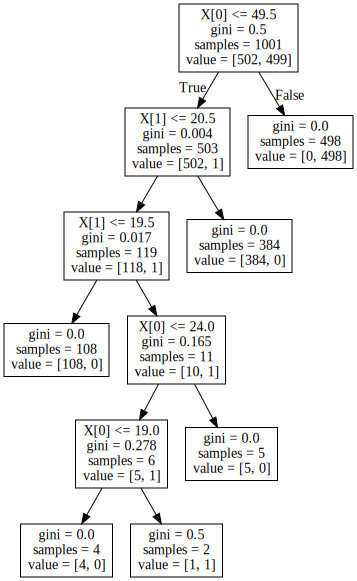

In [14]:
dot_data = tree.export_graphviz(model_sk, out_file=None)
graph = graphviz.Source(dot_data)
graph

The standard algorith can not deal with the error properly.

Of course, we could limit the depth of the tree, or require a minimun number of samples per leaf, but that would imply to optimize an additional hyperparameter.

Let's check with a minimun number of 5 samples per leaf node, a standard technique to avoid overoptimization in decision trees.

In [15]:
model_sk = DecisionTreeClassifier(min_samples_leaf=5)
model_sk.fit(X, y)
model_sk.score(X, y)

0.999000999000999

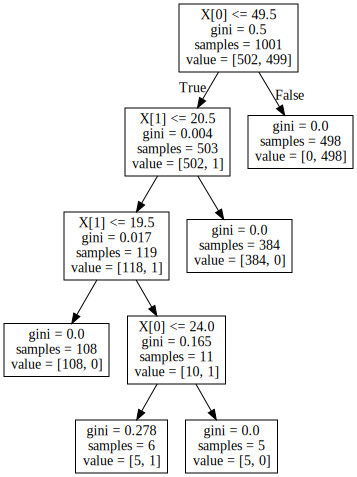

In [16]:
dot_data = tree.export_graphviz(model_sk, out_file=None)
graph = graphviz.Source(dot_data)
graph

That's a surprising result!

### Two lines

In [17]:
random.seed(0)

X = list()
y = list()

for i in range(1000):
    
    p = list([random.randint(0, 100), random.randint(0, 100)])
    X.append(p)
    
    if p[0] >= 50:
        y.append(1)
    else:
        if p[1] >= 20:
            y.append(0)
        else:
            y.append(1)

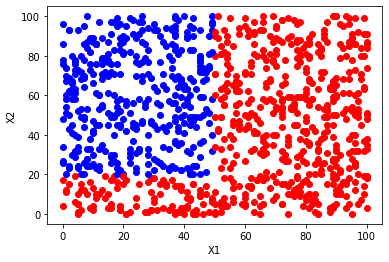

In [18]:
for i in range(len(X)):
    px = X[i][0]
    py = X[i][1]
    if y[i] == 1:
        plt.scatter(px, py, color=['red'])
    else:
        plt.scatter(px, py, color=['blue'])
        
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()        

In [19]:
model = NescienceDecisionTreeClassifier(verbose=True)
model.fit(X, y)

Miscoding:  0.2586098590114435 Inaccuracy:  0.4097593508559283 Surfeit:  0.23750000000000004 Nescience:  0.5396184159123838
Miscoding:  0.0 Inaccuracy:  0.0 Surfeit:  0.4697986577181208 Nescience:  0.4697986577181208
Miscoding:  0.0 Inaccuracy:  0.0 Surfeit:  0.4697986577181208 Nescience:  0.4697986577181208
Final nescience: 0.4697986577181208
def tree{'X1', 'X2'}:
    if X1 < 49.500:
        if X2 < 19.500:
            return 1
        else:
            return 0
    else:
        return 1



In [20]:
model.score(X, y)

1.0

Compare with scikit learn

In [21]:
model_sk = DecisionTreeClassifier()
model_sk.fit(X, y)
model_sk.score(X, y)

1.0

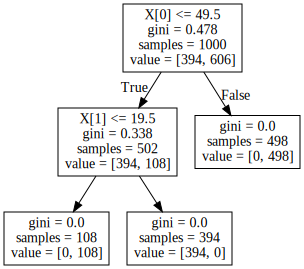

In [22]:
dot_data = tree.export_graphviz(model_sk, out_file=None)
graph = graphviz.Source(dot_data)
graph

We have got the same result.

### Three lines

In [23]:
random.seed(0)

X = list()
y = list()

for i in range(1000):
    
    p = list([random.randint(0, 100), random.randint(0, 100)])    
    X.append(p)
    
    if p[0] >= 50:
        if p[1] >= 30:
            y.append(1)
        else:
            y.append(0)
    else:
        if p[1] >= 20:
            y.append(0)
        else:
            y.append(1)

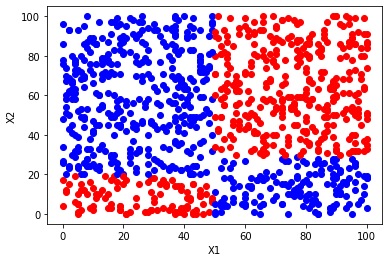

In [24]:
for i in range(len(X)):
    px = X[i][0]
    py = X[i][1]
    if y[i] == 1:
        plt.scatter(px, py, color=['red'])
    else:
        plt.scatter(px, py, color=['blue'])

plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [25]:
model = NescienceDecisionTreeClassifier(verbose=True)
model.fit(X, y)

Miscoding:  0.3630701525021536 Inaccuracy:  0.8266743349895735 Surfeit:  0.23750000000000004 Nescience:  0.9336041140485568
Miscoding:  0.0 Inaccuracy:  0.4257626947076416 Surfeit:  0.44966442953020136 Nescience:  0.619251137576213
Miscoding:  0.0 Inaccuracy:  0.0 Surfeit:  0.5849056603773585 Nescience:  0.5849056603773585
Miscoding:  0.0 Inaccuracy:  0.0 Surfeit:  0.5849056603773585 Nescience:  0.5849056603773585
Final nescience: 0.5849056603773585
def tree{'X1', 'X2'}:
    if X1 < 49.500:
        if X2 < 19.500:
            return 1
        else:
            return 0
    else:
        if X2 < 29.500:
            return 0
        else:
            return 1



In [26]:
model.score(X, y)

1.0

Compare with scikit learn

In [27]:
model_sk = DecisionTreeClassifier()
model_sk.fit(X, y)
model_sk.score(X, y)

1.0

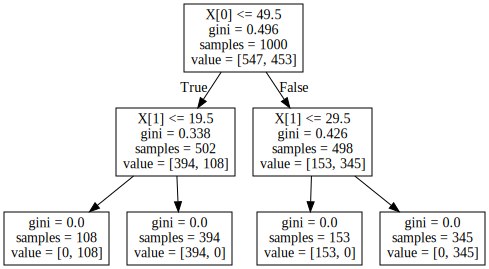

In [28]:
dot_data = tree.export_graphviz(model_sk, out_file=None)
graph = graphviz.Source(dot_data)
graph

### Four lines

This is an interesting example, since a greedy approach is not the optimal way to split the space.

In [29]:
random.seed(0)

X = list()
y = list()

for i in range(1000):
    
    p = list([random.randint(0, 100), random.randint(0, 100)])    
    X.append(p)
    
    if p[0] <= 50:
        if p[1] <= 70:
            if p[1] <= 30:
                y.append(0)
            else:
                y.append(1)
        else:
            y.append(0)
    else:
        if p[1] <= 80:
            if p[1] <= 20:
                y.append(1)
            else:
                y.append(0)
        else:
            y.append(1)

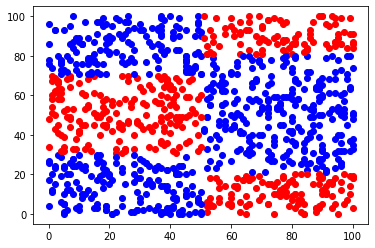

In [30]:
for i in range(len(X)):
    px = X[i][0]
    py = X[i][1]
    if y[i] == 1:
        plt.scatter(px, py, color=['red'])
    else:
        plt.scatter(px, py, color=['blue'])

In [31]:
model = NescienceDecisionTreeClassifier(verbose=True)
model.fit(X, y)

Miscoding:  0.055326801983295315 Inaccuracy:  0.991118871016163 Surfeit:  0.23750000000000004 Nescience:  1.0206781674465524
Miscoding:  0.0 Inaccuracy:  0.8308727519710223 Surfeit:  0.44966442953020136 Nescience:  0.9447473890689624
Miscoding:  0.0 Inaccuracy:  0.8308727519710223 Surfeit:  0.570754716981132 Nescience:  1.0080230537661885
Miscoding:  0.0 Inaccuracy:  0.8128696089988751 Surfeit:  0.6411149825783973 Nescience:  1.035270699923688
Miscoding:  0.0 Inaccuracy:  0.47557161962482664 Surfeit:  0.6925133689839572 Nescience:  0.8400851930691858
Miscoding:  0.0 Inaccuracy:  0.2095501571134134 Surfeit:  0.7310195227765727 Nescience:  0.7604609201180191
Miscoding:  0.0 Inaccuracy:  0.1410713248329442 Surfeit:  0.7607142857142857 Nescience:  0.7736842658216063
Miscoding:  0.0 Inaccuracy:  0.1410713248329442 Surfeit:  0.7779527559055118 Nescience:  0.7906399996908219
Miscoding:  0.0 Inaccuracy:  0.11541132419663754 Surfeit:  0.7880886426592798 Nescience:  0.7964944961776995
Miscoding:

In [32]:
model.score(X, y)

0.968

It has one level more that the ideal tree.

Compare with scikit-learn

In [33]:
model_sk = DecisionTreeClassifier()
model_sk.fit(X, y)
model_sk.score(X, y)

1.0

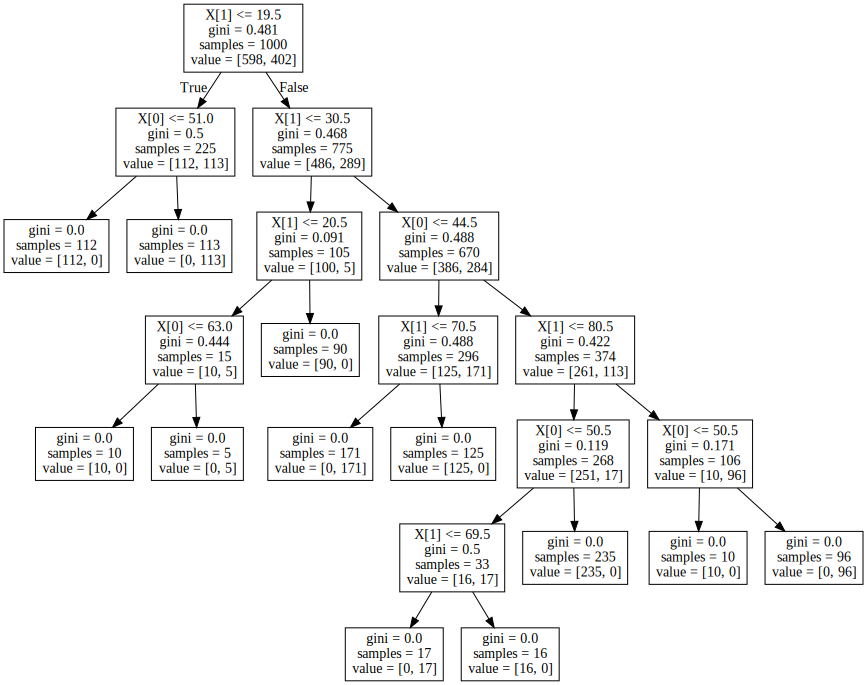

In [34]:
dot_data = tree.export_graphviz(model_sk, out_file=None)
graph = graphviz.Source(dot_data)
graph

There are a couple of branches that are difficult to explain.

Lets force the ideal threelevels

In [35]:
model_sk = DecisionTreeClassifier(max_depth=3)
model_sk.fit(X, y)
model_sk.score(X, y)

0.757

No, it is not a good idea.

### Non linear dataset

In [36]:
random.seed(1)

X = list()
y = list()

for x in range(1000):
    
    p = list([random.randint(0, 100), random.randint(0, 100)])    
    X.append(p)
    
    if p[0]** 2 + p[1]**2 >= 50**2:
        y.append(1)
    else:
        y.append(0)

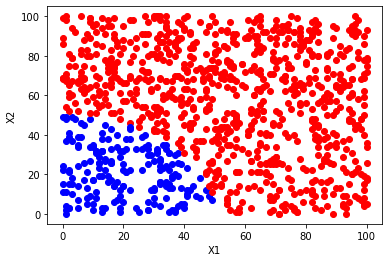

In [37]:
for i in range(len(X)):
    px = X[i][0]
    py = X[i][1]
    if y[i] == 1:
        plt.scatter(px, py, color=['red'])
    else:
        plt.scatter(px, py, color=['blue'])
        
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()        

In [38]:
model = NescienceDecisionTreeClassifier(verbose=True)
model.fit(X, y)

Miscoding:  0.4649682616252717 Inaccuracy:  1.0 Surfeit:  0.25 Nescience:  1.1307941830053898
Miscoding:  0.0 Inaccuracy:  0.2601986523072096 Surfeit:  0.4697986577181208 Nescience:  0.5370420071616709
Miscoding:  0.0 Inaccuracy:  0.2601986523072096 Surfeit:  0.5892857142857143 Nescience:  0.6441746593306141
Miscoding:  0.0 Inaccuracy:  0.20936438685062386 Surfeit:  0.6655948553054662 Nescience:  0.6977463420831687
Miscoding:  0.0 Inaccuracy:  0.20936438685062386 Surfeit:  0.7072538860103628 Nescience:  0.7375916931189619
Miscoding:  0.0 Inaccuracy:  0.10462017383468886 Surfeit:  0.7463002114164905 Nescience:  0.7535976289330394
Miscoding:  0.0 Inaccuracy:  0.10462017383468886 Surfeit:  0.7604895104895105 Nescience:  0.7676520542132196
Miscoding:  0.0 Inaccuracy:  0.09228175623873432 Surfeit:  0.7809239940387481 Nescience:  0.7863575567131887
Miscoding:  0.0 Inaccuracy:  0.07469591414152098 Surfeit:  0.7966751918158568 Nescience:  0.8001692576225793
Miscoding:  0.0 Inaccuracy:  0.07469

In [39]:
model.score(X, y)

0.971

According to the minimum nescience principle, this is a good approximation of a non linear dataset with a linear model. A more complex model would be an overfitting.

Compare with scikit-learn

In [40]:
model_sk = DecisionTreeClassifier()
model_sk.fit(X, y)
model_sk.score(X, y)

1.0

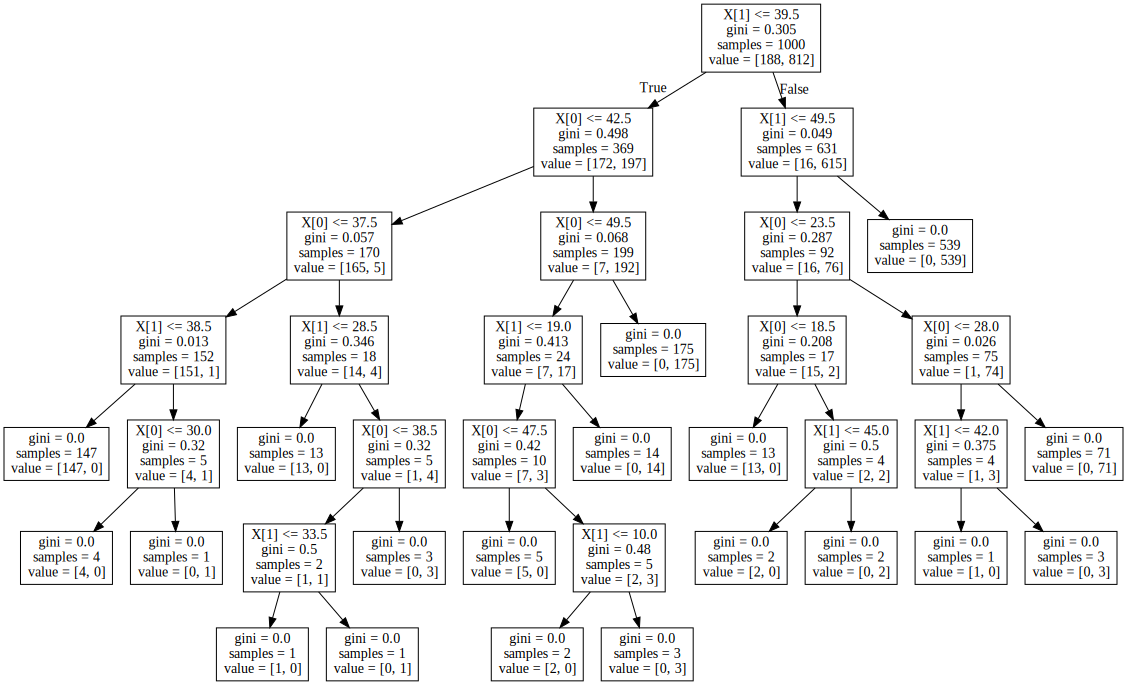

In [41]:
dot_data = tree.export_graphviz(model_sk, out_file=None)
graph = graphviz.Source(dot_data)
graph

Check if we can avoid to overoptimize

In [42]:
model_sk = DecisionTreeClassifier(min_samples_leaf=5)
model_sk.fit(X, y)
model_sk.score(X, y)

0.993

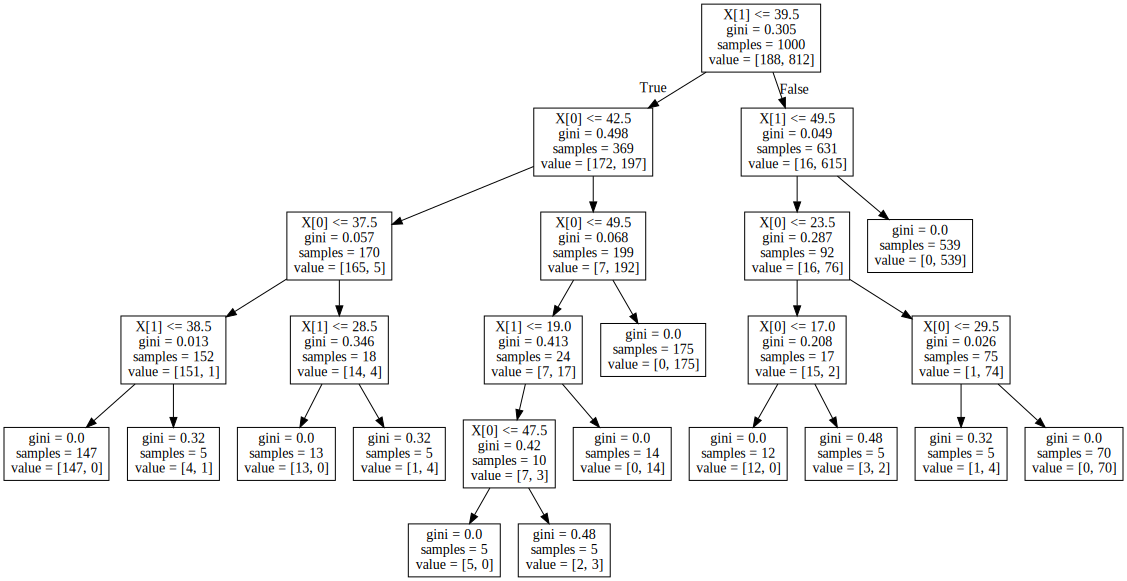

In [43]:
dot_data = tree.export_graphviz(model_sk, out_file=None)
graph = graphviz.Source(dot_data)
graph

Sill a very complex model. Is that a good model?

### Sample Datasets

In this experiments we will use the collection of sample datasets from sklearn. The evaluation will be based on a simple train/test split of the data.

Iris

In [44]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [45]:
model = NescienceDecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.96

In [46]:
model_sk = DecisionTreeClassifier(min_samples_leaf=5)
model_sk.fit(X_train, y_train)
model_sk.score(X_test, y_test)

0.96

Breast cancer

In [47]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [48]:
model = NescienceDecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.925531914893617

In [49]:
model_sk = DecisionTreeClassifier(min_samples_leaf=5)
model_sk.fit(X_train, y_train)
model_sk.score(X_test, y_test)

0.9521276595744681

Digits

In [50]:
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [51]:
model = NescienceDecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8181818181818181

In [52]:
model_sk = DecisionTreeClassifier(min_samples_leaf=5)
model_sk.fit(X_train, y_train)
model_sk.score(X_test, y_test)

0.8417508417508418

Boston

In [53]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [54]:
model = NescienceDecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6575005396334208

In [55]:
model_sk = DecisionTreeRegressor(min_samples_leaf=5)
model_sk.fit(X_train, y_train)
model_sk.score(X_test, y_test)

0.6654923829931516

### Optimal CART with Digits

In the last experiment we have used a hyperparameter of min_samples_leaf of 5 for the CART algorithm implemented by scikit-learn. A more advanced approach would be to use cost-complexity prunning, combined with a cross-valiation to find the optimal tree. Let's apply this procedure to the digits dataset.

In [56]:
X, y = load_digits(return_X_y=True)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
clf  = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)

In [59]:
best_mean  = 0
best_alpha = 0

for ccp_alpha in reversed(path.ccp_alphas):

    model = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=30)
    mean = np.mean(scores)
    
    if mean < best_mean:
        best_mean = mean
        best_alpha = cpp_alpha

In [12]:
model = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8333333333333334

Conpute the number of trees evaluated

In [60]:
len(path.ccp_alphas) * 30

3600

Compare with the nescience algorithm

In [61]:
model = NescienceDecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8417508417508417

Of course, the CART algorith had to train 3630 trees, meanwhile the nescience algorithm only trained one.

### Moving Isotropic Gaussian Blobs x100

In this experiment we will use two clouds of points based on a isotropic Gaussian blobs. 

In [62]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=3, random_state=1)

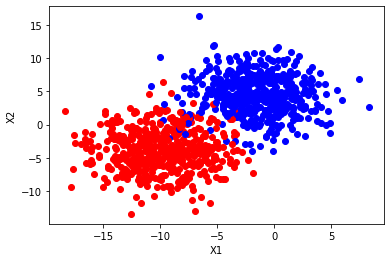

In [63]:
for i in range(len(X)):
    px = X[i][0]
    py = X[i][1]
    if y[i] == 1:
        plt.scatter(px, py, color=['red'])
    else:
        plt.scatter(px, py, color=['blue'])

plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

The experiment will be repeated for differnt values of the standard deviation of the clouds, so the problem becomes more difficult to solve. For each standard deviation we will train/test the models to check how well they can fit the data. We will avoid the overfitting of CART by means of requiring a minimum of 5 samples at leaves.

WARNING: This expeirment could take a lot of time to finish!

In [ ]:
scr_sd = list()

scr_ns = list()
scr_dt = list()

nodes_ns = list()
nodes_dt = list()

depth_ns = list()
depth_dt = list()

for sd in np.arange(2.5, 4.5, 0.01):
                    
    my_scr_ns = list()
    my_scr_dt = list()

    my_nodes_ns = list()
    my_nodes_dt = list()

    my_depth_ns = list()
    my_depth_dt = list()

    for k in range(100):
        
        X, y = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=sd)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
        # Work in parallel
        model = NescienceDecisionTreeClassifier(n_jobs=-1)
        model.fit(X_train, y_train)
        my_scr_ns.append(model.score(X_test, y_test))
        my_nodes_ns.append(model.tree.nodecount())
        my_depth_ns.append(model.tree.maxdepth())
        
        model = DecisionTreeClassifier(min_samples_leaf=5)
        model.fit(X_train, y_train)
        my_scr_dt.append(model.score(X_test, y_test))
        my_nodes_dt.append(model.tree_.node_count)
        my_depth_dt.append(model.tree_.max_depth)        

    scr_sd.append(sd)        
    scr_ns.append(np.mean(my_scr_ns))
    scr_dt.append(np.mean(my_scr_dt))
    nodes_ns.append(np.mean(my_nodes_ns))
    nodes_dt.append(np.mean(my_nodes_dt))
    depth_ns.append(np.mean(my_depth_ns))
    depth_dt.append(np.mean(my_depth_dt))

In [ ]:
plt.plot(scr_sd, scr_ns, label="Nescience")
plt.plot(scr_sd, scr_dt, label="CART")
plt.title("Isotropic Gaussian Blobs")
plt.ylabel("Accuracy")
plt.xlabel("Standard Deviation")
plt.legend(loc='best')

In [ ]:
plt.plot(scr_sd, nodes_ns, label="Nescience")
plt.plot(scr_sd, nodes_dt, label="CART")
plt.title("Isotropic Gaussian Blobs")
plt.ylabel("# Nodes")
plt.xlabel("Standard Deviation")
plt.legend(loc='best')

In [ ]:
plt.plot(scr_sd, depth_ns, label="Nescience")
plt.plot(scr_sd, depth_dt, label="CART")
plt.title("Isotropic Gaussian Blobs")
plt.ylabel("Max Depth")
plt.xlabel("Standard Deviation")
plt.legend(loc='best')

### Moving Isotropic Gaussian Blobs x100 vith optimal CART

For the final experiment, we will compare agains an optimal CART tree, computed with a cost-complexity prunning and a cross-validation.

WARNING: This expeirment could take a lot of time to finish!

In [ ]:
scr_sd = list()

scr_ns = list()
scr_dt = list()

nodes_ns = list()
nodes_dt = list()

depth_ns = list()
depth_dt = list()

for sd in np.arange(2.5, 4.5, 0.01):
            
    my_scr_ns = list()
    my_scr_dt = list()

    my_nodes_ns = list()
    my_nodes_dt = list()

    my_depth_ns = list()
    my_depth_dt = list()

    for k in range(100):
        
        X, y = make_blobs(n_samples=10000, centers=2, n_features=2, cluster_std=sd)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
        model = NescienceDecisionTreeClassifier(n_jobs=-1)
        model.fit(X_train, y_train)
        my_scr_ns.append(model.score(X_test, y_test))
        my_nodes_ns.append(model.tree.nodecount())
        my_depth_ns.append(model.tree.maxdepth())
        
        clf  = DecisionTreeClassifier()
        path = clf.cost_complexity_pruning_path(X_train, y_train)
        best_mean  = 0
        best_alpha = 0
        for ccp_alpha in reversed(path.ccp_alphas):
            model = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
            scores = cross_val_score(model, X_train, y_train, cv=30)
            mean = np.mean(scores)
            if mean < best_mean:
                best_mean = mean
                best_alpha = cpp_alpha
        model = DecisionTreeClassifier(ccp_alpha=best_alpha)
        model.fit(X_train, y_train)
        my_scr_dt.append(model.score(X_test, y_test))
        my_nodes_dt.append(model.tree_.node_count)
        my_depth_dt.append(model.tree_.max_depth)        

    scr_sd.append(sd)        
    scr_ns.append(np.mean(my_scr_ns))
    scr_dt.append(np.mean(my_scr_dt))
    nodes_ns.append(np.mean(my_nodes_ns))
    nodes_dt.append(np.mean(my_nodes_dt))
    depth_ns.append(np.mean(my_depth_ns))
    depth_dt.append(np.mean(my_depth_dt))

In [ ]:
plt.plot(scr_sd, scr_ns, label="Nescience")
plt.plot(scr_sd, scr_dt, label="CART")
plt.title("Isotropic Gaussian Blobs")
plt.ylabel("Accuracy")
plt.xlabel("Standard Deviation")
plt.legend(loc='best')

In [ ]:
plt.plot(scr_sd, nodes_ns, label="Nescience")
plt.plot(scr_sd, nodes_dt, label="CART")
plt.title("Isotropic Gaussian Blobs")
plt.ylabel("# Nodes")
plt.xlabel("Standard Deviation")
plt.legend(loc='best')

In [ ]:
plt.plot(scr_sd, depth_ns, label="Nescience")
plt.plot(scr_sd, depth_dt, label="CART")
plt.title("Isotropic Gaussian Blobs")
plt.ylabel("Max Depth")
plt.xlabel("Standard Deviation")
plt.legend(loc='best')